The normal equation

In [44]:
# let's generate some data adding some random noise
import numpy as np

X = 2 * np.random.rand(100, 1) # [0, 2]
y = 4 + (3 * X) + np.random.rand(100, 1)


# Out function is
# y = 4 + 3*x + Gaussian noise


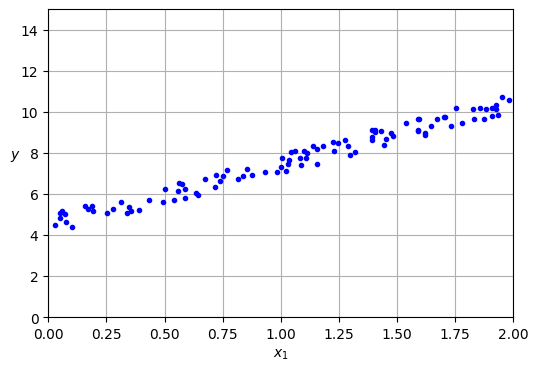

In [45]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [46]:
# let's calc the value that minimize the cost function using the normal equation
X_b = np.c_[np.ones((100, 1)), X] # this to add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [47]:
# What we found:
theta_best

array([[4.52666073],
       [2.96938567]])

We were looking for y = 4 + 3*x + noise, we found something similar.
we can now do prdiction using theta

In [48]:
X_new = np.array([[0], [2]]) # create x
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b @ (theta_best) # do prediction, a dot multi with our found values
y_predict   # print them

array([[ 4.52666073],
       [10.46543208]])

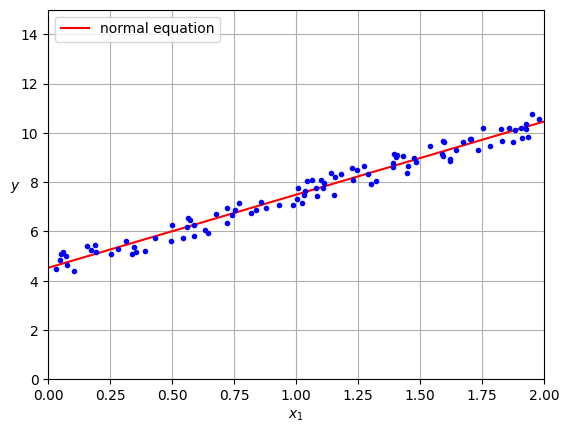

In [49]:
# and plot them against the original values
plt.plot(X_new, y_predict, "r-", label="normal equation") # found function in red line 
plt.plot(X, y, "b.") # original values in dot blue
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
plt.show()

Now we use Linear regression and check results

In [50]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() # instance 
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ # print what we found

(array([4.52666073]), array([[2.96938567]]))

In [51]:
# and the prediction ...
y_predict_lr = lin_reg.predict(X_new) # ok let's seeeee

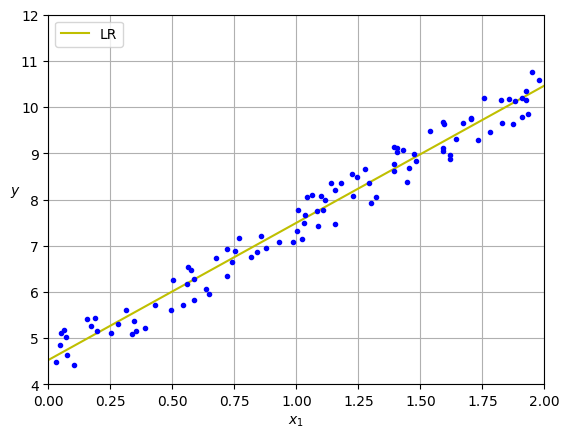

In [52]:
# and plot them against the original values
plt.plot(X_new, y_predict_lr, "y-", label="LR") # found function in yellow line 
#plt.plot(X_new, y_predict, "r-", label="normal equation") # they sovrappose!
plt.plot(X, y, "b.") # original values in dot blue
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 4, 12])
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [53]:
# call directly linear regression from his base class
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.52666073],
       [2.96938567]])

Gradient descent

Let's begin with batch gradient descent

In [54]:
etas = [0.02, 0.1, 0.5] # learning rate, different of them


n_epochs = 1000
m = 100
theta_found = []

for eta in etas:
    theta = np.random.randn(2,1) # random initialization
    for iteration in range(n_epochs):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
    theta_found.append(theta)
    

In [55]:
# and see the result, whic more or less is 4 + 3
theta_found

[array([[4.52417799],
        [2.97140084]]),
 array([[4.52666073],
        [2.96938567]]),
 array([[-1.13419544e+115],
        [-1.39735469e+115]])]

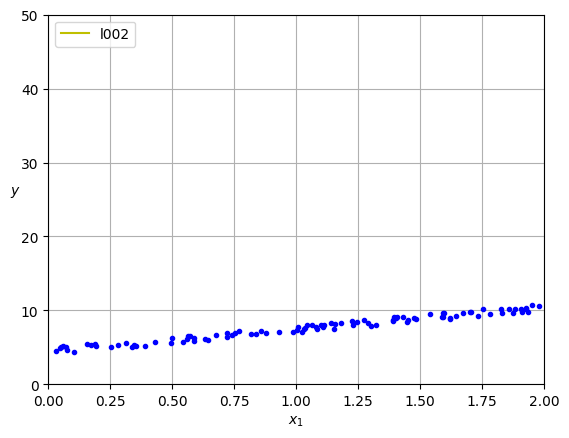

In [56]:

#y_gb_prediction = []
#for theta_test in theta_found:
#    X_new = np.array([[0], [2]]) # create x
#    X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
#    y_gb_prediction.append(X_new_b @ (theta_test)) # do prediction, a dot multi with our found values
#
y_gb_prediction = (X_new_b @ (theta_found[2]))

# plt.plot(X_new, y_gb_prediction[0], "y-", label="l002") # found function in yellow line
# plt.plot(X_new, y_gb_prediction[1], "c-", label="l01") # found function in yellow line
# plt.plot(X_new, y_gb_prediction[2], "g-", label="l05") # found function in yellow line

plt.plot(X_new, y_gb_prediction, "y-", label="l002") # found function in yellow line
# and plot them against the original values
plt.plot(X, y, "b.") # original values in dot blue
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 50])
plt.grid()
plt.legend(loc="upper left")
plt.show()

Stochastic Gradient Descent

In [57]:
n_epochs = 50 # note: before we iterated 1000 !
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m) # taking it randomly !
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [58]:
theta

array([[4.52772511],
       [2.97604715]])

In [59]:
# and if we want to use directly scikit learn ... use the SGDRegressor ! 

# param: max nr of iteration
# eta is the learning rate
# loss drop = 1e-3

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [60]:
# and what we found ... yeah quite similar !
sgd_reg.intercept_, sgd_reg.coef_

(array([4.52124289]), array([3.00075754]))

Mini-batch Gradient Descent

Polynomial Regression

In [61]:
# generate some quadratic data plus noise
# y = 0.5*X^2 + X + 2 + noise
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

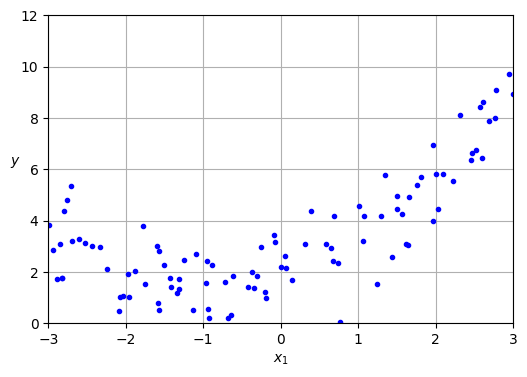

In [62]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 12])
plt.grid()
plt.show()

In [63]:
# use PolynomialFeatures class from scikit learn
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [64]:
X[0]

array([-1.50198628])

In [65]:
# X_poly now contains the original feature of X plus the square of this feature
X_poly[0]

array([-1.50198628,  2.2559628 ])

In [66]:
# now we can use LinearReg
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.90987867]), array([[0.91786105, 0.48297014]]))

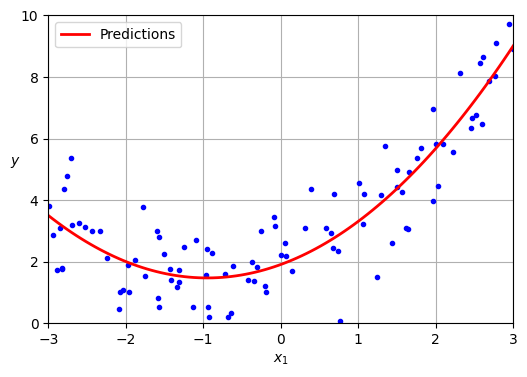

In [67]:
# the model estimate 0.48x^2 + 0.989x + 2, which is more or less what we had
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Learning Curves


Regularized Linear Models

Ridge regression

In [68]:
# a new dataset ....
np.random.seed(42)
m = 100
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

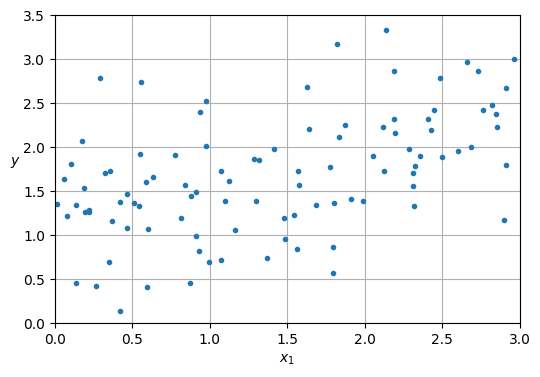

In [69]:
# super noisy
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [70]:
#
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky") # matrix factoriazioni
ridge_reg.fit(X, y)

ridge_reg.predict([[1.5]]) # let's see a prediction

array([[1.73969402]])

In [71]:
# using stochastic 
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None, max_iter=1000, eta0=0.01, random_state=42) # The penalty hyperparameter sets the type of regularization term to use 
sgd_reg.fit(X, y.ravel()) # ravel, beacause fir expect 1D targets
sgd_reg.predict([[1.5]])

array([1.74136712])

Lasso Regression
Least Absolute Shrinkage and Selection Operator Regression 

Elastic Net


Early stopping

Logistic Regression

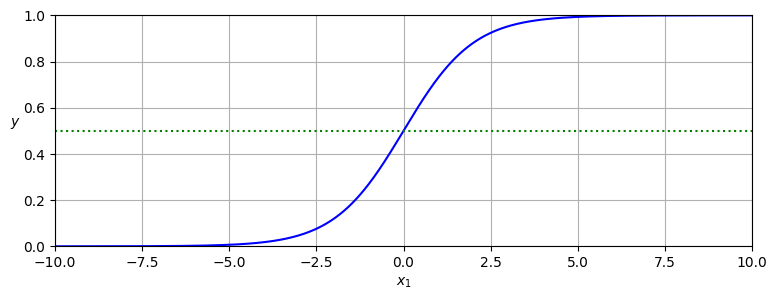

In [72]:
# the concept of Sigmoid function
X_sig = np.linspace(-10, 10, 1000).reshape(1000, 1)
y_sig = 1 / (1 + np.exp(-X_sig))

plt.figure(figsize=(9, 3))
plt.plot(X_sig, y_sig, "b-")
plt.plot([-10, 10], [0.5, 0.5], "g:")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([-10, 10, 0, 1])
plt.grid()
plt.show()

Test with the iris dataset, it contains data from 150 iris flowers categorized in 3 different species: Iris versicolar, Iris setosa and Iris virginica

In [73]:
# build a classifier to detect iris virginica
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [96]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [74]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [78]:
X_iris = iris["data"][:, 3:]  # index 3 is petal width!
y_iris = (iris["target"] == 2).astype(np.int_)  # 1 if Iris virginica, else 0. and convert to int!


In [79]:
# train a logist regression model with the iris dataset
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_iris, y_iris)

LogisticRegression()

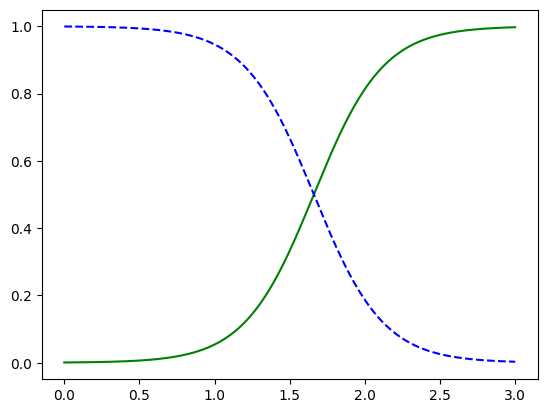

In [85]:
X_test_iris = np.linspace(0, 3, 1000).reshape(-1, 1) #test with petal witdh from 0 to 3
y_proba_iris = log_reg.predict_proba(X_test_iris) # do predictions on (the probability!!)

plt.plot(X_test_iris, y_proba_iris[:, 1], "g-", label="Iris virginica")      # plot index 1, so class recognized
plt.plot(X_test_iris, y_proba_iris[:, 0], "b--", label="Not Iris virginica")

plt.show()

In [89]:
y_proba_iris.shape

(1000, 2)

In [92]:
iris["data"].shape

(150, 4)

In [106]:
X_2feat_iris = iris["data"][:, (2, 3)]  # index 3 is petal width!

y_2feat_iris = (iris["target"] == 2).astype(np.int_)  # 1 if Iris virginica, else 0. and convert to int!

In [107]:
# note that C in the inverse of theta (the learning rate!! )
log_reg_2feat = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg_2feat.fit(X_2feat_iris, y_2feat_iris)

LogisticRegression(C=10000000000, random_state=42)

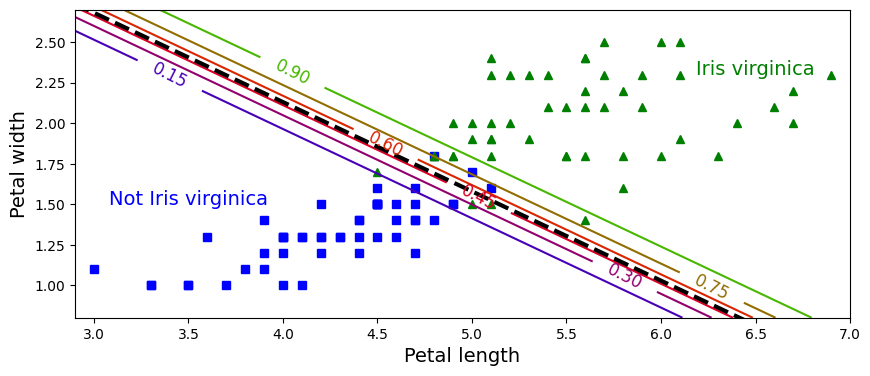

In [110]:
len_test, widh_test = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1), # length
        np.linspace(0.8, 2.7, 200).reshape(-1, 1), # width
    )
X_2feat = np.c_[len_test.ravel(), widh_test.ravel()] # C concatenate !

y_prb_2feat = log_reg_2feat.predict_proba(X_2feat)

plt.figure(figsize=(10, 4))
plt.plot(X_2feat_iris[y_2feat_iris==0, 0], X_2feat_iris[y_2feat_iris==0, 1], "bs")
plt.plot(X_2feat_iris[y_2feat_iris==1, 0], X_2feat_iris[y_2feat_iris==1, 1], "g^")

zz = y_prb_2feat[:, 1].reshape(len_test.shape)
contour = plt.contour(len_test, widh_test, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg_2feat.coef_[0][0] * left_right + log_reg_2feat.intercept_[0]) / log_reg_2feat.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [112]:
X_2feat.shape

(100000, 2)

Softmax regression

In [113]:
# Logistic regression can support multiple class without having multiple binary classifier
# and the class that do that is the Softmax regression !
# note: softmax regression is multiclass but NOT multioutput! it ouputs the highes probability class

In [114]:
y_softmax_iris = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X_2feat_iris, y_softmax_iris)

LogisticRegression(C=10, multi_class='multinomial')

In [120]:
# test with 5cm length and 2 cm widht
iris.target_names[softmax_reg.predict([[5, 2]])]

array(['virginica'], dtype='<U10')

In [116]:
# print probabilities for each class
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])